In [2]:
# import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read dataset using read_csv() 
df = pd.read_csv("E:\ICTAK-DSA\Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Pre-processing

In [4]:
df.shape #dimensions of the data

(178, 13)

In [5]:
df.columns #print the columns/features of the data

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
df.info() #returns range, column, number of non-null objects of each column, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.count() #number of non null values in each column.

Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
dtype: int64

In [8]:
 df.isna().sum() #print the sum of null values for each columns

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
df.describe() #basic info of the dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Outlier Detection and Handling

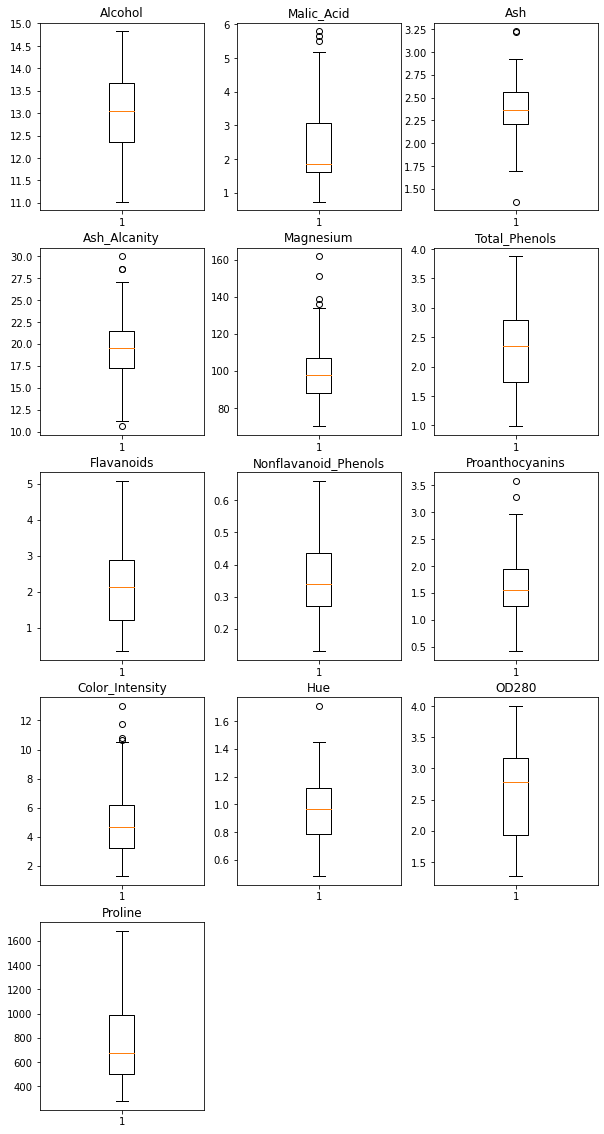

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(10,20))
for i,feature in enumerate(df.columns):
    plt.subplot(5,3,i+1)
    plt.boxplot(df[feature])
    plt.title(feature)
plt.show()

In [11]:
for features in df.columns[1:-3]:
    OF_Q1 = df[features].quantile(0.25) 
    OF_Q2 = df[features].quantile(0.50)
    OF_Q3 = df[features].quantile(0.75) 
    OF_IQR = OF_Q3-OF_Q1
    OF_low_limit = OF_Q1-1.5*OF_IQR
    OF_up_limit = OF_Q3+1.5*OF_IQR
    OF_outlier= df[(df[features] < OF_low_limit ) | (df[features] > OF_up_limit )]
    df[features] = df[features].clip(OF_up_limit,OF_low_limit)

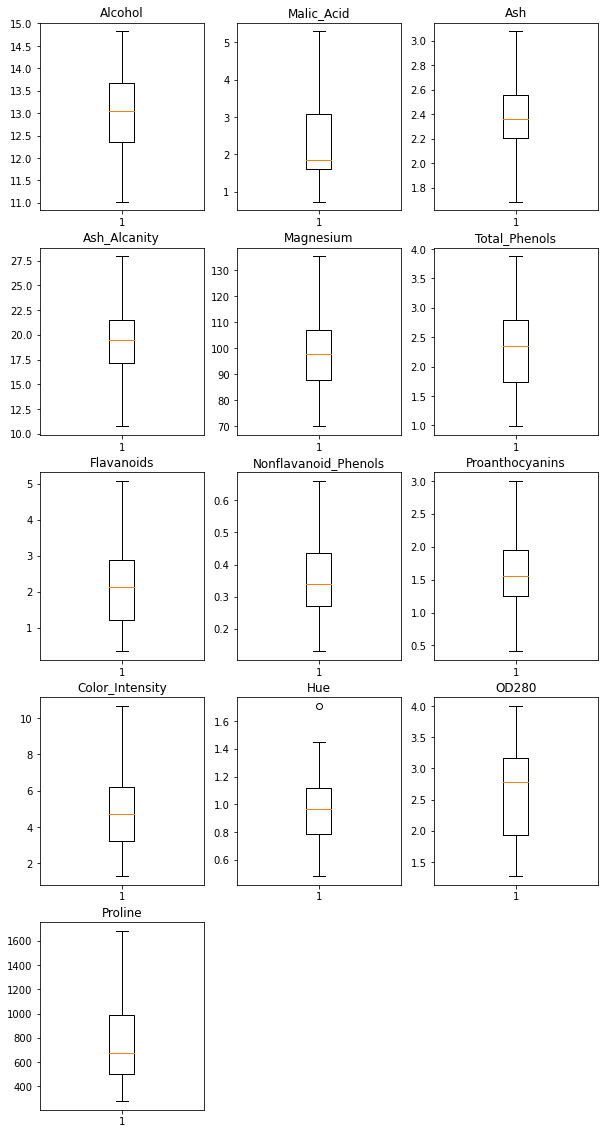

In [12]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(10,20))
for i,feature in enumerate(df.columns):
    plt.subplot(5,3,i+1)
    plt.boxplot(df[feature])
    plt.title(feature)
plt.show()

Co-relation

In [13]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.071747,0.072343,0.643720
Malic_Acid,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.564294,-0.372582,-0.191173
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.076723,-0.011214,0.229676
Ash_Alcanity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.283540,-0.287032,-0.448700
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.037513,0.064019,0.411557
Total_Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.305883,0.530565,0.340562
Color_Intensity,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.519928,-0.430638,0.327100


<AxesSubplot:>

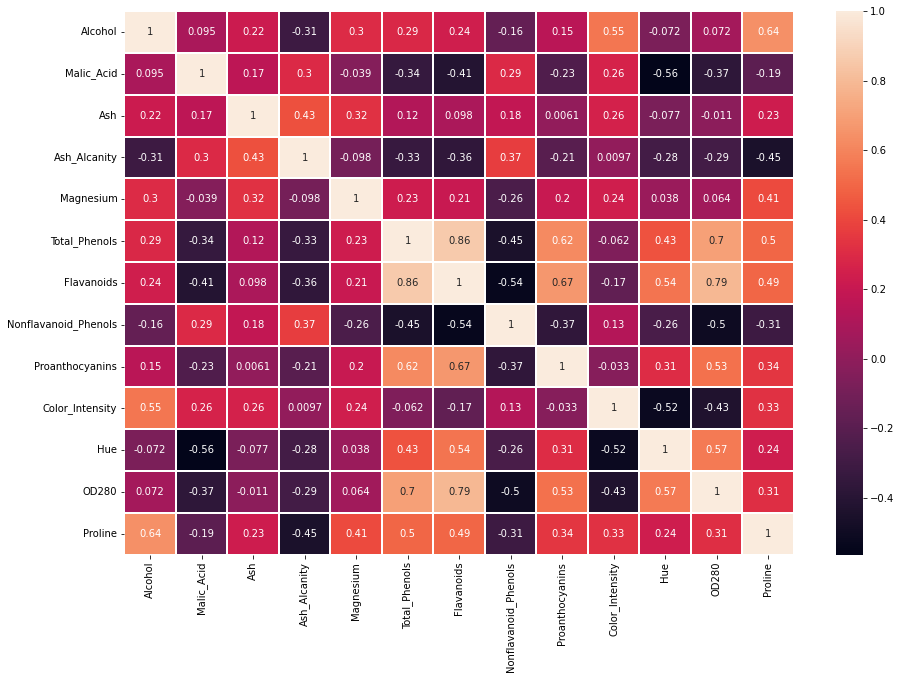

In [14]:
from sklearn import preprocessing
corrmet = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmet,annot=True,linewidth=.2)

# Try out different clustering models in the wine dataset.

# Find the optimum number of clusters in each model and create the model with the optimum number of clusters

Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1 = sc.fit_transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.362177,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.406051,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.318304,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.427544,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.362177,0.449601,-0.037874


K-Means Clustering

In [17]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(df1)
    inertia.append(model.inertia_)
print(inertia)

[2313.9999999999995, 1655.5680029489565, 1266.993037228927, 1167.5497138095714, 1101.587457632506, 1039.8340122837528, 990.0139037232032, 949.3430029494652, 902.8809948675226, 873.4178842107254]


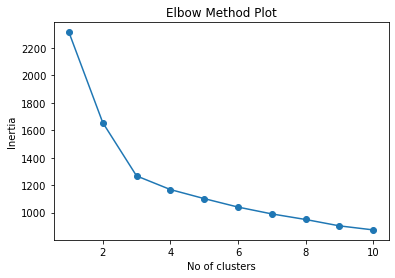

In [18]:
plt.plot(ks,inertia,'-o')
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df1)
km=model_kmeans.predict(df1)
print(model_kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
df1['KMean_ClusterID']= pd.Series(km)
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_ClusterID
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.362177,1.847920,1.013009,2
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.406051,1.113449,0.965242,2
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.318304,0.788587,1.395148,2
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.427544,1.184071,2.334574,2
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.362177,0.449601,-0.037874,2


In [22]:
from sklearn.metrics import silhouette_score
print("Silhouette score of K-Means cluster:",silhouette_score(df1,km))

Silhouette score of K-Means cluster: 0.32060649828289345


Agglomerative Hierarchical clustering

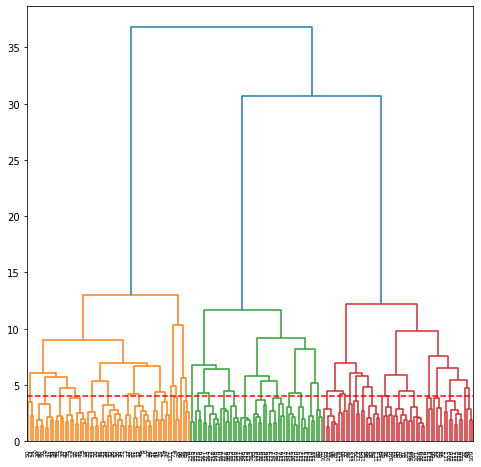

In [23]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(df1,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

In [24]:
model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(df1)
labels_sc = model_kmeans.predict(df1)
print(labels_sc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
df1['AHC_ClusterID']= pd.Series(labels_sc)
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_ClusterID,AHC_ClusterID
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.362177,1.847920,1.013009,2,1
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.406051,1.113449,0.965242,2,1
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.318304,0.788587,1.395148,2,1
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.427544,1.184071,2.334574,2,1
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.362177,0.449601,-0.037874,2,1


In [26]:
from sklearn.metrics import silhouette_score
print("Silhouette score of Agglomerative cluster:",silhouette_score(df1,labels_sc))

Silhouette score of Agglomerative cluster: 0.3474692774483208


Comparing the CLustering Methods 

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df2 = pca.fit_transform(df1)
pca_final = pd.DataFrame(df2, columns=['First Principal Component', 'Second Principal Component'])
pca_final.head()

,First Principal Component,Second Principal Component
0,3.443010,-1.653266
1,2.329469,-0.184015
2,2.643510,-1.201927
3,3.864867,-2.732251
4,1.167163,-1.124974


In [34]:

pca.components_

array([[ 0.14664411, -0.23619564,  0.00202414, -0.23773446,  0.13960508,
         0.38225259,  0.41115384, -0.2860388 ,  0.30534292, -0.08210219,
         0.28627949,  0.36502941,  0.28402538,  0.17347513,  0.15418022],
       [-0.41861617, -0.19731912, -0.25575518,  0.0358833 , -0.26567187,
        -0.03685607,  0.01756309, -0.02542278, -0.00185483, -0.44993444,
         0.23769463,  0.14858844, -0.32025979, -0.36296949,  0.36179797]])

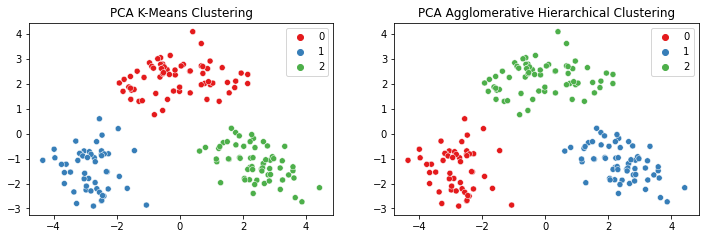

In [44]:
ax=[]
names=["PCA K-Means Clustering","PCA Agglomerative Hierarchical Clustering"]
comp=[km,labels_sc]
fig=plt.figure(figsize=(12,12))
for i in range(0,2):
  ax.append(fig.add_subplot(3,2,(i+1)))
  sns.scatterplot(df2[:,0],df2[:,1],hue=comp[i],ax=ax[i],palette="Set1")
  ax[i].set_title(names[i])
plt.show()

There is not much difference in these clustering methods 

And  for optimum number of clusters in each model we can take the value as 3